# Import libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms

%matplotlib inline

# Uploading datasets

In [3]:
df = pd.read_csv('data-sets/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Preparing  data for analysis

## Check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is nothing wrong with the data types

## Check the values for missing

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missings

## General information of data

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Analysis

## Boxplot for each score

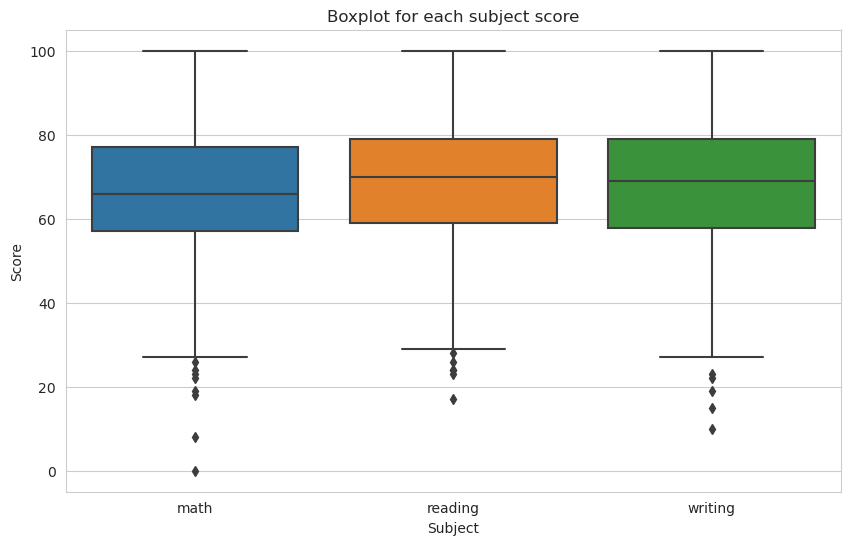

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['math score'], df['reading score'], df['writing score']])

plt.xticks([0, 1, 2], ['math', 'reading', 'writing'])
plt.xlabel('Subject')
plt.ylabel('Score')
plt.title('Boxplot for each subject score')
    
plt.show()

The graph shows that the median is almost at the same level, also the IQR (interquartile range). It can be seen that the reading results are better. Mathematics has the most outliers

## Distribution of scores

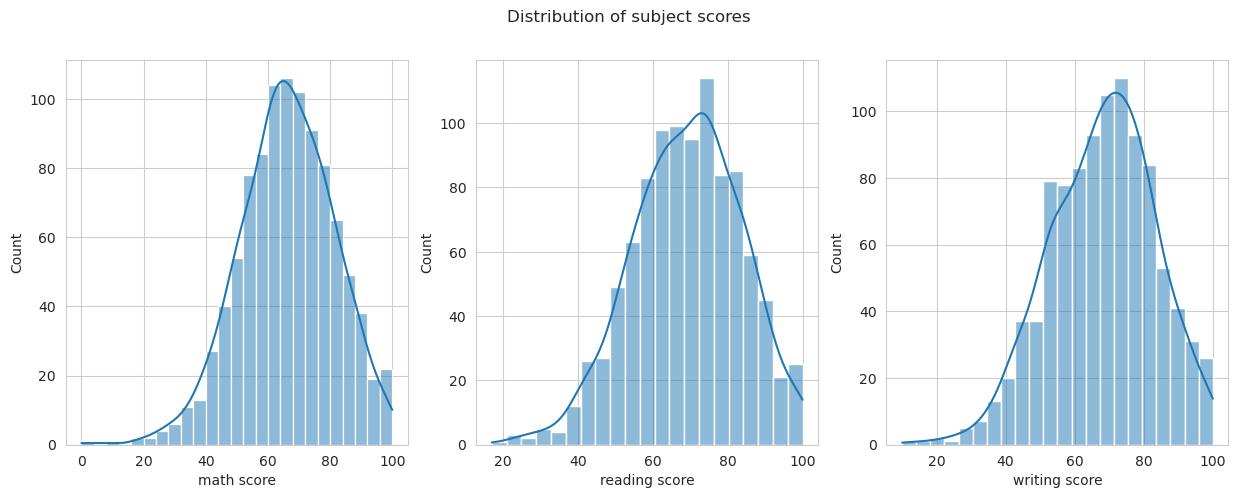

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(df.select_dtypes(include=['number'])):
    if i != 3:
        sns.histplot(data=df[col], ax=ax[i], kde=True)

plt.suptitle('Distribution of subject scores')
plt.show()

## Distribution of sum scores

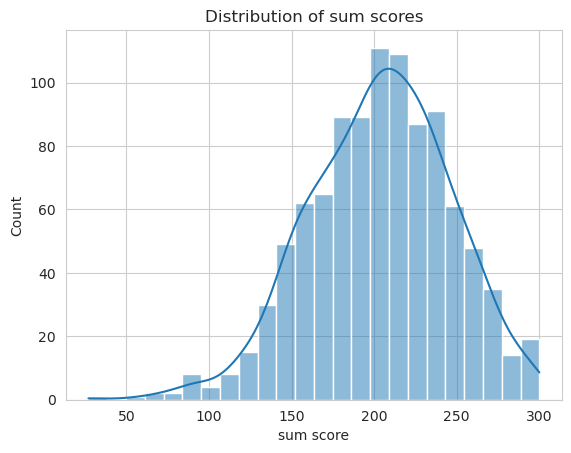

In [55]:
df['sum score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)

sns.histplot(df['sum score'], kde=True)

plt.title('Distribution of sum scores')
plt.show()

As we can see, distribution are the same and close to normal.

## Students by gender

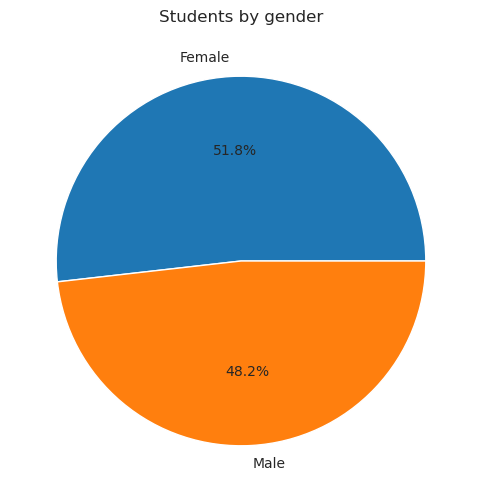

In [22]:
plt.figure(figsize=(10, 6))
plt.pie(df['gender'].value_counts(), autopct='%1.1f%%', labels=['Female', 'Male'])
plt.title('Students by gender')

plt.show()

The students are split almost evenly

## Students by parental level of education	

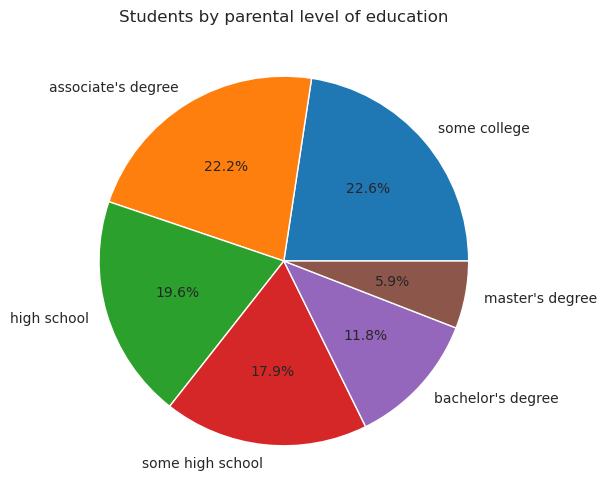

In [40]:
labels = df['parental level of education'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(df['parental level of education'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by parental level of education')

plt.show()

## Students by race/ethnicity

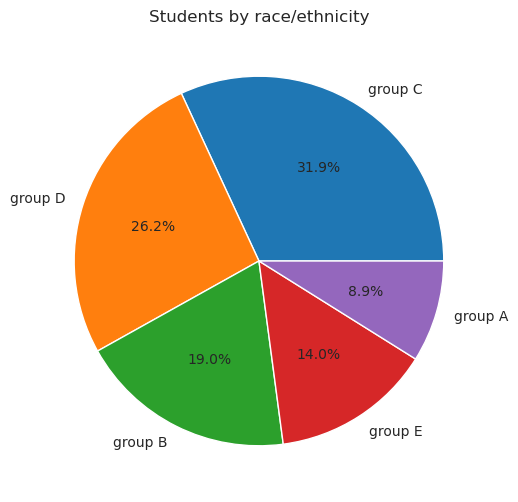

In [38]:
labels = df['race/ethnicity'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(df['race/ethnicity'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by race/ethnicity')

plt.show()

## Students by test preparation course

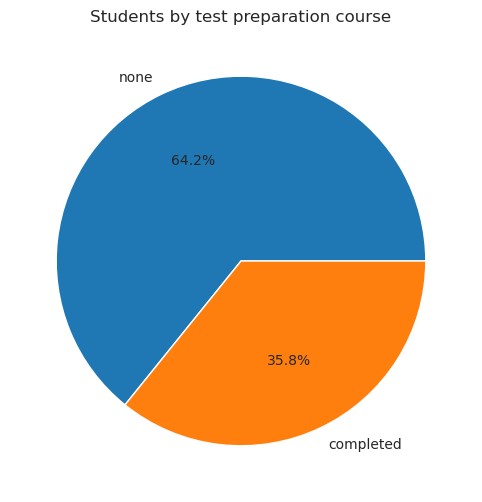

In [43]:
labels = df['test preparation course'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(df['test preparation course'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by test preparation course')

plt.show()

Most have not taken any courses

## Students by lunch

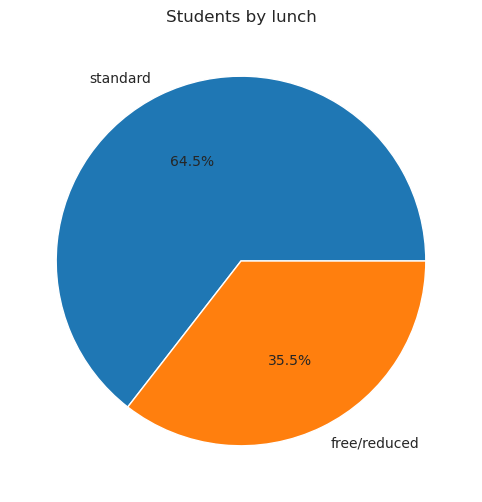

In [57]:
labels = df['lunch'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(df['lunch'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by lunch')

plt.show()

In [59]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


# Correlation analysis

For further analysis, we convert columns with object type into categorical variables

In [97]:
df_encoded = df.iloc[:, :5].apply(lambda x: pd.Categorical(x).codes)
df_encoded[['math score', 'reading score', 'writing score', 'sum score']] = df.iloc[:, 5:]
df_encoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278
3,1,0,0,0,1,47,57,44,148
4,1,2,4,1,1,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282
996,1,2,2,0,1,62,55,55,172
997,0,2,2,0,0,59,71,65,195
998,0,3,4,1,0,68,78,77,223


## Heatmap

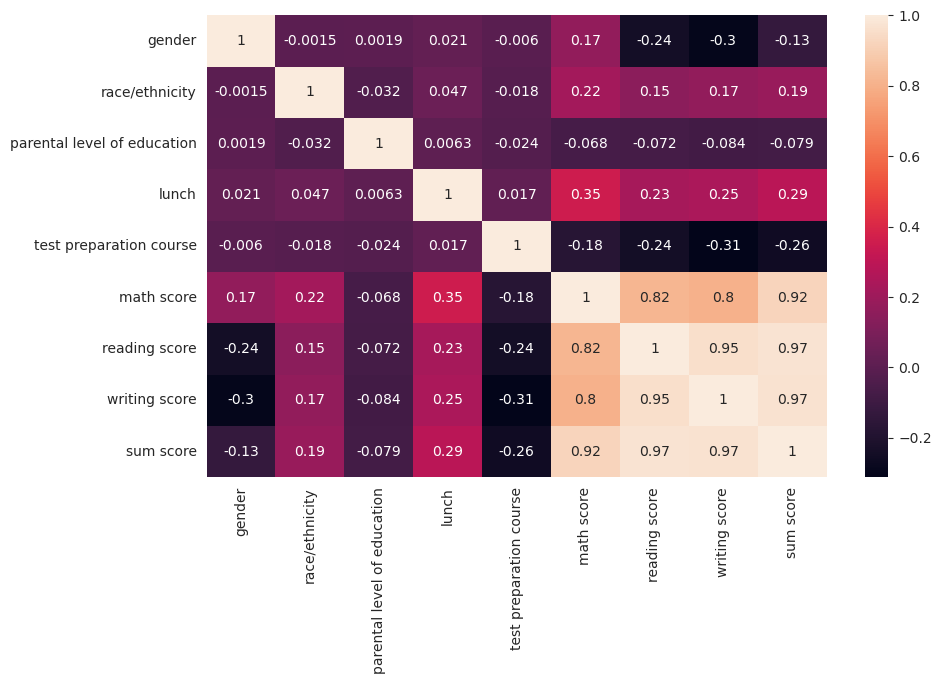

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True)

plt.show()

The independent variables are not correlated with each other. We can make regression analyses

In [105]:
X = df_encoded[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df_encoded['sum score']

X = sms.add_constant(X)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sum score   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     51.67
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.07e-47
Time:                        19:16:26   Log-Likelihood:                -5058.8
No. Observations:                1000   AIC:                         1.013e+04
Df Residuals:                     994   BIC:                         1.016e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         198.7926      3.994     49.775      0.000     190.955     206.630
gender                        -11.8274      2.418     -4.891      0.000     -16.573      -7.082
race/ethnicity                  6.0714      1.046      5.803      0.000       4.018       8.125
parental level of education    -1.9048      0.661     -2.881      0.004      -3.202      -0.607
lunch                          25.9394      2.528     10.259      0.000      20.978      30.901
test preparation course       -23.3248      2.521     -9.251      0.000     -28.273     -18.377
==============================================================================
Omnibus:                       10.953   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.160
Skew:                          -0.259   Prob(JB):                      0.00377
Kurtosis:                       2.978   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the analysis, it can be seen that the F-statistic has a value of 51.67 and the p-value for the F-statistic is close to zero (1.07e-47), indicating that the model is statistically significant overall. The coefficient of determination (R-squared) is 0.206, which means that about 20.6% of the variability in the dependent variable "sum score" is explained by the independent variables in the model. This may be important information, but it also indicates that much of the variability remains unexplained. The P-values for all coefficients in the model are zero or close to zero, indicating that all coefficients are statistically significant. This means that each of the categorical variables has a significant effect on the "sum score." 

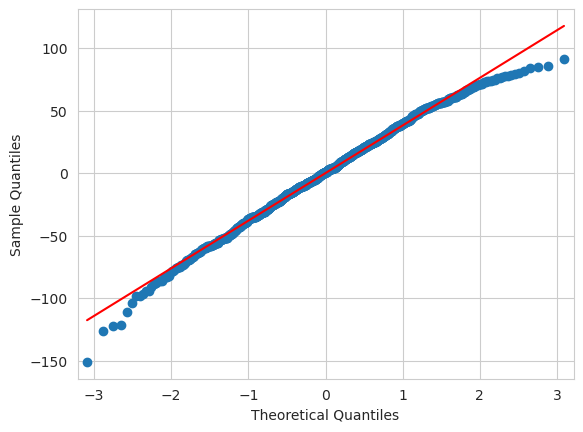

In [106]:
residuals = model.resid
sms.qqplot(residuals, line='s')
plt.show()

The residuals are distributed close to normal, so all is well.

# Conclusion

The project analyses data on students' scores in different subjects. The main statistical characteristics of the data are derived and graphs showing the distribution of scores by subject and total scores are plotted. Categorical variables such as gender, parental education, race/ethnicity, taking preparatory courses and nutrition of students were also analysed.

Multiple regression analysis was conducted which showed statistical significance of the model as a whole and the importance of each categorical variable. In doing so, the model explained about 20.6% of the variability in the dependent variable, total scores.

Overall, the project comprehensively analysed the student score data and identified important factors affecting the total scores.